# Applied Linear Algebra - Lab 4
Ferdowsi University of Mashhad - Computer Engineering Department

Jan 2024

### Table of Contents
* [PART ONE - Implementing SVD](#part1)
  * [Singular Value Decomposition](#1-svd)
  * [Exercise 1](#1-ex1)

* [PART TWO - Create Word Embeddings](#part2)
  * [Importing Libraries](#import)
  * [Loading The Dataset](#load)
    * [Dataset Information](#dataset_info)
    * [Exercise 1](#ex1)
  * [Preprocessing The Data](#preprocess)
    * [Exercise 2](#ex2)
  * [Creating Vocabulary](#creating_vocab)
  * [Introduction to Natural Language Processing](#intro_nlp)
    * [Word Vectors](#word_vectors)
    * [SVD Based Methods](#SVD_based)
  * [Constructing Co-occurrence Matrix](#constructing)
    * [Exercise 3](#ex3)
    * [Sparse Matrix](#sparse_matrix)
    * [Exercise 4](#ex4)
    * [Exercise 5](#ex5)
  * [Singular Value Decomposition](#2-svd)
    * [Exercise 6](#ex6)
    * [Exercise 7](#ex7)
  * [Cosine Similarity](#cos)
    * [Exercise 8](#ex8)
    * [Exercise 9](#ex9)
    * [Exercise 10](#ex10)
    * [Exercise 11](#ex11)

* [Resources](#resources)


# Part 1- Implementing SVD <a class="anchor" id="part1"></a>

## Singular Value Decomposition <a class="anchor" id="1-svd"></a>

The Singular Value Decomposition (SVD) separates any matrix into simple pieces. it provides a numerically stable matrix decomposition that can be used for
a variety of purposes and is guaranteed to exist.

In many domains, complex systems will generate data that is naturally arranged in
large matrices, or more generally in arrays. For example, a time-series of data from an
experiment or a simulation may be arranged in a matrix with each column containing all of
the measurements at a given time.

The pixel values in a grayscale image may be stored in a matrix,
or these images may be reshaped into large row vectors in a matrix to represent the
frames of a movie. Remarkably, the data generated by these systems are typically low rank,
meaning that there are a few dominant patterns that explain the high-dimensional data. The
SVD is a numerically robust and efficient method of extracting these patterns from data.

Generally, we are interested in analyzing a large data set $X_{n \times d}$:

$$
X = \begin{bmatrix}
\text{---} & x_1 & \text{---} \\
\text{---} & x_2 & \text{---} \\
. & . & . \\
\text{---} & x_n & \text{---} \\
\end{bmatrix}
$$

The rows $x_i \in C_d$ may be measurements from simulations or experiments. For example, columns may represent images that have been reshaped into row vectors with as
many elements as pixels in the image.

The SVD is a unique matrix decomposition that exists for every matrix
 $X_{n \times d}$:

$$
\bf X = \bf U \times \Sigma \times \bf V^\intercal
$$

where $ \bf U_{n \times n}$ is a matrix containing unit eigenvectors of $X X^\intercal$ and $\bf V_{d \times d}$ is containing unit eigenvectors of $X^\intercal X$.

$ \bf \Sigma$ is a diagonal matrix containing square roots of the equal eigenvalues of $ X X^\intercal$ and $X^\intercal X$ (Singular Values $\sigma$.)

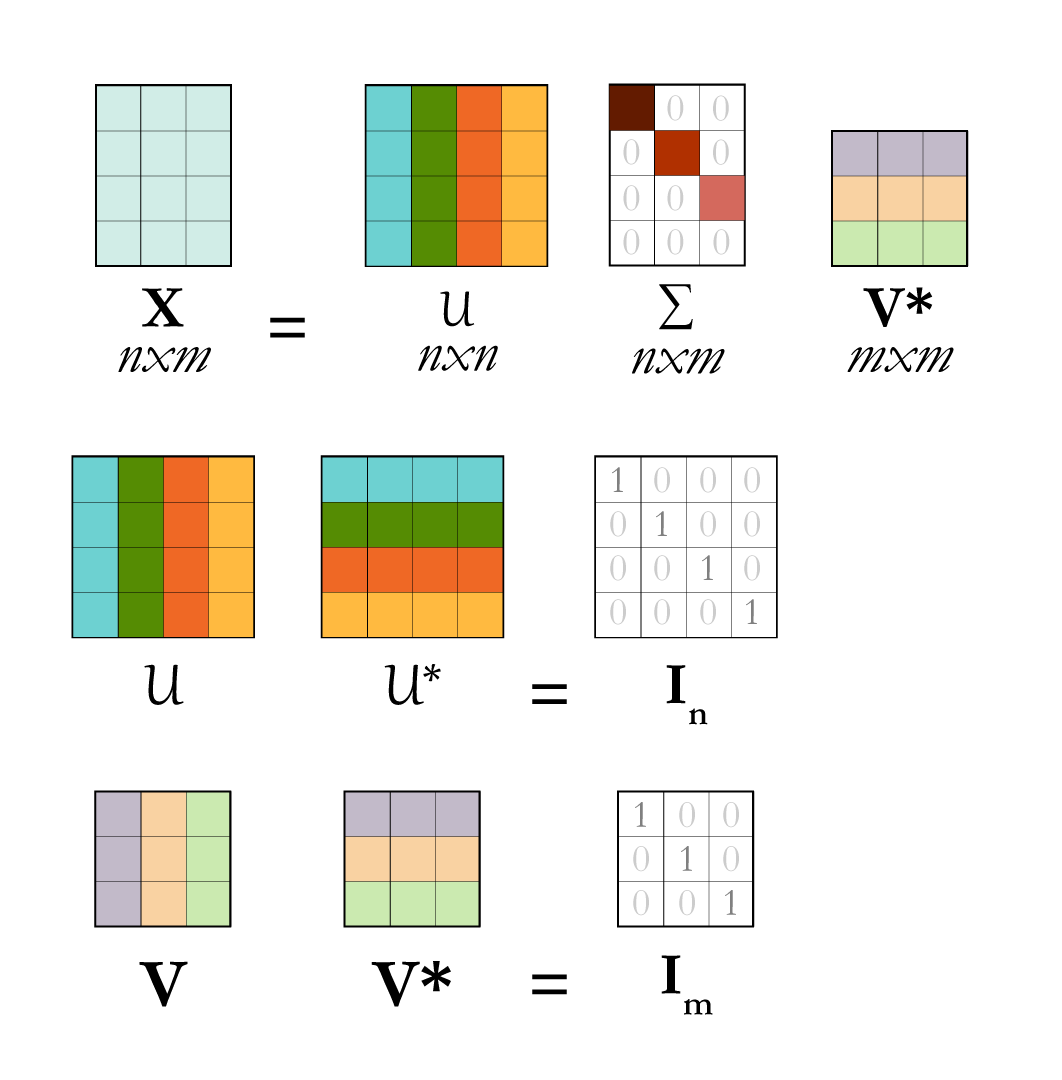

## Exercise 1 <a class="anchor" id="1-ex1"></a>
Define function `svd()` which takes matrix $ \bf X_{n \times d}$ and applies SVD decomposition then returns $ \bf U_{n \times n} , \bf \Sigma_{n \times d},  \bf V^\intercal_{d \times d} $

We've seen steps of SVD decomposition in Chapter 7 of the course.

In [1]:
from numpy.linalg import eig
from numpy import argsort
from numpy import diag
import numpy as np

def svd(X):
    # compute X.T * X
    xtx = np.dot(X.T, X)

    # calculate eigenvalues and eigenvectors of XTX
    # use linalg.eig() function, it returns eigenvalues and normalized (unit length) eigenvectors,
    # such that the i-th column
    # is the eigenvector corresponding to the i-th eigenvalue
    eig_vals, V = eig(xtx)
    # singular values of X are the square root of the non-negative eigenvalues of XtX or XXt
    singular_vals = np.sqrt(eig_vals)

    # sort both sigular values and matrix V in descending order so that
    # the higher values are placed before the lower ones.
    # use np.argsort(), it returns the indices that would sort an array
    sort_indices = argsort(singular_vals)
    sort_indices = sort_indices[::-1] #descending
    singular_vals = singular_vals[sort_indices]
    V = V[:, sort_indices]

    # U is matrix of eigenvectors of XXT
    # calculate U using X, V and singular_vals
    U = np.dot(X, V)
    U = U / singular_vals

    # sigma matrix is a diagonal matrix with singular values of X in its diagonal
    sigma = diag(singular_vals)

    return U.real, sigma.real, V.T.real

In [2]:
xx = np.random.random((5, 5))
print(xx)
ux, sx, vx = svd(xx)

[[0.95472556 0.25003561 0.67409268 0.01238782 0.67820517]
 [0.60975684 0.64026625 0.65451784 0.93713898 0.80011917]
 [0.43872416 0.48377775 0.67686619 0.30239082 0.59651544]
 [0.89054783 0.83286369 0.81570017 0.89655294 0.15998471]
 [0.35116311 0.12169618 0.45355605 0.53172675 0.67274888]]


If your `svd()` implementation is correct, matrix `xx` must be equal to $U \times S \times V$

In [3]:
print('Original matrix: \n', xx)
print('U S V: \n', ux @ sx @ vx)

Original matrix: 
 [[0.01356276 0.4571596  0.78025225 0.01048297 0.94780015]
 [0.41186721 0.18399282 0.83190967 0.62399722 0.88167539]
 [0.25070582 0.91201919 0.49018549 0.41469684 0.18924518]
 [0.81980325 0.92087521 0.10102653 0.36535632 0.75692438]
 [0.50995057 0.53126142 0.53472411 0.6272217  0.89878992]]
U S V: 
 [[0.01356276 0.4571596  0.78025225 0.01048297 0.94780015]
 [0.41186721 0.18399282 0.83190967 0.62399722 0.88167539]
 [0.25070582 0.91201919 0.49018549 0.41469684 0.18924518]
 [0.81980325 0.92087521 0.10102653 0.36535632 0.75692438]
 [0.50995057 0.53126142 0.53472411 0.6272217  0.89878992]]


# Part 2- Create Word Embeddings <a class="anchor" id="part2"></a>

In this part, we are going to create word embeddings using a SVD based method.

First, let's prepare the dataset we are going to work with.

## Importing Libraries <a class="anchor" id="import"></a>

Run the cell below to import all the required libraries.

In [1]:
import gzip
import shutil
from heapq import nlargest

import json, ast, re, os, nltk

nltk.download('punkt')
from operator import itemgetter
import operator
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

import warnings
warnings.filterwarnings("ignore")
import pickle
from scipy.sparse import dok_matrix
from sklearn.utils.extmath import randomized_svd
from scipy import spatial
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import gensim.downloader
import numpy as np
from tqdm import tqdm, trange
from sklearn.decomposition import PCA
from numpy import dot
from numpy.linalg import norm

[nltk_data] Downloading package punkt to /home/alimtt/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
2024-01-31 01:05:03.353243: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-31 01:05:03.797348: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-31 01:05:03.797550: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-31 01:05:03.873885: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-31 01:05:04.037128: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda driver

## Loading The Dataset <a class="anchor" id="load"></a>

First, change directory to the directory you wish to work with.

In [2]:
%cd "./"


/media/alimtt/work/daneshga/projects/linear algebra/FUM-Linear-Algebra-02-01-Lab#04


In [3]:
BASE_DIR = 'data'
import os
if not os.path.exists(BASE_DIR):
    os.makedirs(BASE_DIR)

### Dataset Information <a class="anchor" id="dataset_info"></a>

**Web data: Amazon reviews**

This dataset consists of reviews from amazon. The data span a period of 18 years, including ~35 million reviews up to March 2013. Reviews include product and user information, ratings, and a plaintext review.

Run the cell below to download the dataset.

*You only need to run this cell once.*

In [ ]:
!wget http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_10.json.gz

You don't have to change the implementation of the following function, but you will use it.

In [10]:
def get_data():
  with gzip.open('reviews_Electronics_10.json.gz', 'rb') as f_in:
    with open('Electronics_10.json', 'wb') as f_out:
      shutil.copyfileobj(f_in, f_out)
  raw_text=[]
  f = open('Electronics_10.json',)
  for line in f:
    res = ast.literal_eval(line)
    raw_text.append(res["reviewText"].lower())

  f.close()
  return raw_text

### Exercise 1 <a class="anchor" id="ex1"></a>

Using the `get_data()` function, get the raw text data.

For a better understanding of the dataset, print the length of the data and its first entry.

In [12]:
# this may take some time
raw_text = get_data() 
print("Length of the data: ", len(raw_text))
print("First entry of the data: ", raw_text[0])

Length of the data:  347393
First entry of the data:  this mount is just what i needed.  it is strong and sturdy.  it folds almost flat to enable the television to sit square and flat against the wall if desired and extends and rotates for angle turns.  a perfect fit as long as you match the correct visa pattern for your television.


In [13]:
os.remove("Electronics_10.json")

## Preprocessing The Data <a class="anchor" id="preprocess"></a>

Data preprocessing is the concept of changing the raw data into a clean data set.

You don't have to change the implementation of the following functions, but you will use them.

The `raw_text_to_sentences()` method takes the raw text as input and extracts its sentences into the given file. It returns a dictionary containing each word and its frequency in the dataset, and the total number of words in the dataset.

In [14]:
def raw_text_to_sentences(raw_text, name_to_write: str):
  count_dictionary = {}
  word_count = 1
  f = open(f"{BASE_DIR}/{name_to_write}.txt","x")
  f.close()
  f = open(f"{BASE_DIR}/{name_to_write}.txt","w" )
  for para in raw_text:
    nltk_tokens = nltk.sent_tokenize(para)
    for words in nltk_tokens:
      sent = re.findall("[A-Za-z]+", words)
      line = ""
      for word in sent:
        line = line + ' ' + word.lower()
        word_count += 1
        try:
          count_dictionary[word.lower()] += 1
        except KeyError:
          count_dictionary[word.lower()] = 1
      f.write(line)
      f.write("\n")
  f.close()
  return count_dictionary, word_count

For better results, we can omit the infrequent words. The `remove_infrequent_words()` method removes the words that are repeated less than a specified number from the dataset. This values is passed to the function as "frequency".

In [15]:
def remove_infrequent_words(count_dictionary, frequency, xx, name_to_write: str):
  less_freq_word = 0
  f = open(f"{BASE_DIR}/{name_to_write}.txt", "r")
  lines = f.readlines()
  no_of_lines = len(lines)

  for i in range(no_of_lines):
    x = ""
    words = lines[i].split()
    for word in words:
      try:
        if count_dictionary[word] > frequency and count_dictionary[word] < xx:
          x = x + ' ' + word
        else :
          less_freq_word += 1
      except KeyError:
        pass
    lines[i] = x + "\n"

  f = open(f"{BASE_DIR}/{name_to_write}.txt", "w")
  f.writelines(lines)
  f.close()
  return

### Exercise 2 <a class="anchor" id="ex2"></a>
Use the previous functions to convert the first 1 million enteries of the raw text data to sentences.

Then remove the words whose frequency is less than 5.

In [18]:
# this may take some time
count_dictionary, word_count = raw_text_to_sentences(get_data(), 'sentences')

d = dict(sorted(count_dictionary.items(), key = itemgetter(1), reverse = True)[:50])
xx = min(d.values())

remove_infrequent_words(count_dictionary, 5, xx, 'sentences')

del raw_text
del d

FileExistsError: [Errno 17] File exists: 'data/sentences.txt'

In [17]:
file = open(f"{BASE_DIR}/sentences.txt","r")
Counter = 0
Content = file.read()
CoList = Content.split("\n")

for i in CoList:
    if i:
        Counter += 1

print("This is the number of lines in the file:")
print(Counter)
file.close()

This is the number of lines in the file:
2604766


## Creating Vocabulary <a class="anchor" id="creating_vocab"></a>

You can view the sentences.txt file. It contains 2604766 lines of text.

In this section, we are going to assign each word an index based on its frequency.

In [4]:
f = open(f"{BASE_DIR}/sentences.txt", "r")
lines = f.readlines()
f.close()

The `tf.keras.preprocessing.text.Tokenizer` class allows you to vectorize a text corpus.

The `fit_on_texts()` method updates internal vocabulary based on a list of texts. This method creates the vocabulary index based on word frequency.

For example, for the text "*the cat sat on the mat*", it will create a dictionary such as word_index["the"] = 1, word_index["cat"] = 2, ...

It is a word -> index dictionary, so every word gets a unique integer value. Lower integer means more frequent word (often the first few are stop words because they appear a lot).

[further reading](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer)

In [20]:
# this may take some time
tokenizer = Tokenizer()
tokenizer.fit_on_texts(lines)

# assign indexes to words
word_to_index = tokenizer.word_index
vocab_length = len(word_to_index)

# assign words to indexes
index_to_words = {}
for k,v in word_to_index.items():
    index_to_words[v] = k

In [21]:
index_to_words

{1: 'had',
 2: 'well',
 3: 'there',
 4: 'than',
 5: 'get',
 6: 'these',
 7: 'me',
 8: 'camera',
 9: 'about',
 10: 'which',
 11: 'other',
 12: 'only',
 13: 'also',
 14: 'do',
 15: 'case',
 16: 'some',
 17: 'quality',
 18: 'them',
 19: 'what',
 20: 'time',
 21: 'don',
 22: 'much',
 23: 'usb',
 24: 'sound',
 25: 'really',
 26: 'works',
 27: 'drive',
 28: 'm',
 29: 'using',
 30: 'any',
 31: 'cable',
 32: 'work',
 33: 'price',
 34: 'even',
 35: 've',
 36: 'by',
 37: 'used',
 38: 'does',
 39: 'better',
 40: 'need',
 41: 'because',
 42: 'little',
 43: 'into',
 44: 'd',
 45: 'easy',
 46: 'now',
 47: 'device',
 48: 'off',
 49: 'am',
 50: 'then',
 51: 'product',
 52: 'back',
 53: 'nice',
 54: 'after',
 55: 'screen',
 56: 'still',
 57: 'lens',
 58: 'been',
 59: 'two',
 60: 'its',
 61: 'want',
 62: 'tv',
 63: 'over',
 64: 'too',
 65: 'computer',
 66: 'power',
 67: 'while',
 68: 'could',
 69: 'first',
 70: 'set',
 71: 'battery',
 72: 'most',
 73: 'new',
 74: 'small',
 75: 'way',
 76: 'bought',
 77:

You should be able to see that more frequent words such as "had", "there", "these", "do", ... have lower indexes.

We can use the `word_to_index` dictionary to obtain the index of each word, and the `index_to_word` dictionary to do vice versa.

Since the size of the matrices are large, constructing them again can be time consuming. Instead, you can save them and load them later.

Run the cells below to save and load the created vocabulary.

In [22]:
loc = f'{BASE_DIR}/word_to_index.pkl'
with open(loc,'wb') as f:
    pickle.dump(word_to_index, f)

loc = f'{BASE_DIR}/index_to_words.pkl'
with open(loc,'wb') as f:
    pickle.dump(index_to_words, f)

In [5]:
loc = f'{BASE_DIR}/word_to_index.pkl'
infile = open(loc,'rb')
word_to_index = pickle.load(infile)

loc = f'{BASE_DIR}/index_to_words.pkl'
infile = open(loc,'rb')
index_to_words = pickle.load(infile)

vocab_length = len(word_to_index)

## Introduction to Natural Language Processing <a class="anchor" id="intro_nlp"></a>

The goal of NLP is to be able to design algorithms to allow computers to "understand" natural language in order to perform some task.

The first and arguably most important common denominator across all NLP tasks is how we represent words as input to any and all of our models.

To perform well on most NLP tasks we first need to have some notion of similarity and difference between words. With word vectors, we can quite easily encode this ability in the vectors themselves (using distance measures such as
Jaccard, Cosine, Euclidean, etc).


### Word Vectors <a class="anchor" id="word_vectors"></a>

There are an estimated 13 million tokens for the English language, but are they all completely unrelated? Feline to cat, hotel to motel? I think not. Thus, we want to encode word tokens each into some vector that represents a point in some sort of "word" space.

The most intuitive reason for this, is that perhaps there actually exists some N-dimensional space (such that N <= 13 million) that is sufficient to encode all semantics of our language.

Each dimension would encode some meaning that we transfer using speech.

### SVD Based Methods <a class="anchor" id="SVD_based"></a>

For this class of methods to find word embeddings (otherwise known as word
vectors), we first loop over a massive dataset and accumulate word co-occurrence counts in some form of a matrix $X$. We have already prepared the dataset in the previous sections.

This step is done in the next section: [Constructing Co-occurrence Matrix](#constructing)

We then perform Singular Value Decomposition on $X$ to get a $USV^T$ decomposition. We use the rows of U as the word embeddings for all words in our dictionary.

This step is done in the section: [Singular Value Decomposition](#2-svd)

## Constructing Co-occurrence Matrix <a class="anchor" id="constructing"></a>

**Window based Co-occurrence Matrix**

We make the bold conjecture that words that are related will often appear within a small window from one another. For instance, "banks", "bonds", "stocks", "money", etc. are probably likely to appear together. But "banks", "octopus", "banana", and "hockey" would probably not consistently appear together.

We use this fact to build a co-occurrence matrix, $X$, in the following manner:

Loop over the dataset and for each time word $i$ appears in a certain distance (window) from word $j$, we add one to entry $X_{ij}$.

In this method, we count the number of times each word appears inside a
window of a particular size around the word of interest. We calculate
this count for all the words in corpus.


We display an example below.

Let our corpus contain just three sentences and the window size be 1:
1. I enjoy flying.
2. I like NLP.
3. I like deep learning.

The resulting co-occurrence matrix will then be:

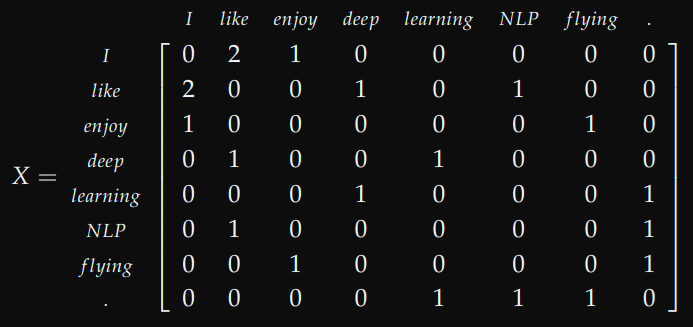

### Exercise 3 <a class="anchor" id="ex3"></a>
As you can see, most of the elements of the resulting co-occurence matrix, $X$, have 0 value. Why is this true? Would the same thing happen for another corpus?

In [ ]:
# write your answer in this cell
#A co-occurrence matrix is typically sparse (i.e., it contains a lot of zeros). The reason is that in most texts (or corpora),
#This results in many elements of the co-occurrence matrix having a value of zero, indicating that those word pairs do not co-occur in the text.

#This is not just true for one specific corpus, but for any corpus. However,
#the degree of sparsity can vary depending on the corpus. For instance, a very
#large and diverse corpus might have a less sparse co-occurrence matrix than a small,
#narrowly-focused corpus, because the larger corpus is more likely to contain a wider
#variety of word pairs. Nonetheless, even in a large corpus, it's still likely that many possible
#word pairs do not actually co-occur, resulting in a sparse co-occurrence matrix.

### Sparse Matrix <a class="anchor" id="sparse_matrix"></a>

If most of the elements of a matrix have 0 value, then it is called **a sparse matrix**.
For example:

$$
X =
\begin{pmatrix}
0 & 0 & 3 & 0 & 4 \\
0 & 0 & 5 & 7 & 0 \\
0 & 0 & 0 & 0 & 0 \\
0 & 2 & 6 & 0 & 0 \\
\end{pmatrix}
$$

Representing a sparse matrix by a 2D array leads to wastage of lots of memory as zeroes in the matrix are of no use in most of the cases. So, instead of storing zeroes with non-zero elements, we only store non-zero elements. This means storing non-zero elemenarray leads to wastage of lots of memoryts with triples (Row, Column, value).

The two major benefits of using sparse matrix instead of a simple matrix are:

**Storage:** There are lesser non-zero elements than zeros and thus lesser memory can be used to store only those elements.

**Computing time:** Computing time can be saved by logically designing a data structure traversing only non-zero elements.

Sparse matrices are generally utilized in applied machine learning such as in data containing data-encodings that map categories to count and also in entire subfields of machine learning such as natural language processing (NLP).

Since most of the elements of the mentioned co-occurence matrix, $X$, have 0 value, we are going ot use a sparse matrix.

### Exercise 4 <a class="anchor" id="ex4"></a>
Complete the `create_co_oc_matrix()` method. In this method, we count the number of times each word appears inside a window of a particular size around the word of interest. We calculate this count for all the words in corpus.

Set the window size to 2; meaning that only the 2 words after and the 2 words before any given word should be considered.

In [24]:
def create_co_oc_matrix(data):
  d = {}
  for line in data:
    line = line[:-1]
    words = line.split()
    no_of_words = len(words)
    index = 0
    for word in words:
      k = word_to_index[word]
      start = index - 2
      end = index + 2 
      for i in range(start, end + 1):
        if 0 <= i < index or index < i < no_of_words:
          try:
            d[k, word_to_index[words[i]]] += 1
          except KeyError:
            d[k, word_to_index[words[i]]] = 1
      index += 1
  return d

### Exercise 5 <a class="anchor" id="ex5"></a>
Using the `create_co_oc_matrix()` method, construct the co-occurence matrix for our dataset.

In [27]:
# this may take some time
cooccurence_matrix = create_co_oc_matrix(lines)

In [28]:
cooccurence_matrix

{(373, 19): 91,
 (373, 219): 116,
 (19, 373): 91,
 (19, 219): 2277,
 (219, 373): 116,
 (219, 19): 2277,
 (691, 546): 177,
 (546, 691): 177,
 (2291, 278): 14,
 (2291, 653): 155,
 (278, 2291): 14,
 (278, 653): 77,
 (278, 2359): 8,
 (653, 2291): 155,
 (653, 278): 77,
 (653, 2359): 1,
 (653, 1390): 42,
 (2359, 278): 8,
 (2359, 653): 1,
 (2359, 1390): 3,
 (2359, 1260): 2,
 (1390, 653): 42,
 (1390, 2359): 3,
 (1390, 1260): 5,
 (1390, 2243): 1,
 (1260, 2359): 2,
 (1260, 1390): 5,
 (1260, 2243): 6,
 (1260, 653): 114,
 (2243, 1390): 1,
 (2243, 1260): 6,
 (2243, 653): 26,
 (2243, 852): 3,
 (653, 1260): 114,
 (653, 2243): 26,
 (653, 852): 180,
 (653, 421): 179,
 (852, 2243): 3,
 (852, 653): 180,
 (852, 421): 427,
 (852, 2217): 2,
 (421, 653): 179,
 (421, 852): 427,
 (421, 2217): 10,
 (421, 3633): 8,
 (2217, 852): 2,
 (2217, 421): 10,
 (2217, 3633): 1,
 (2217, 4918): 1,
 (3633, 421): 8,
 (3633, 2217): 1,
 (3633, 4918): 4,
 (3633, 594): 4,
 (4918, 2217): 1,
 (4918, 3633): 4,
 (4918, 594): 3,
 (4918

The constructed co-occurence matrix is a dictionary. We can use it to build a sparse matrix.

The `scipy.sparse.dok_matrix` class is an efficient structure for constructing sparse matrices incrementally. This can be instantiated in several ways, such as with the matrix we constructed (`cooccurence_matrix`).

[further reading](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.dok_matrix.html)

In [29]:
X = dok_matrix((vocab_length + 1, vocab_length + 1))
for k, v in cooccurence_matrix.keys():
    X[k, v] = cooccurence_matrix[k, v]

del lines
del cooccurence_matrix

In [30]:
X.shape

(37080, 37080)

$X$ is the co-occurence matrix for our dataset, and it is a sparse matrix.

Run the cells below to save and load the co-occurence matrix $X$.

In [31]:
loc = f'{BASE_DIR}/co_occure_mat.pkl'
with open(loc,'wb') as f:
    pickle.dump(X, f)

In [6]:
loc = f'{BASE_DIR}/co_occure_mat.pkl'
infile = open(loc,'rb')
X = pickle.load(infile)

## Singular Value Decomposition <a class="anchor" id="2-svd"></a>

In this section, we perform Singular Value Decomposition on the co-occurence matrix $X$, to get a $USV^T$ decomposition.

### Exercise 6 <a class="anchor" id="ex6"></a>
Using the `svd()` method you implemented in [part one](#part1), apply SVD on $X$.

In [ ]:
ux, sx, vx = svd(X)

As you can see, using your simple implementation of SVD takes a long time to compute resutls. Therefore, it is not efficient for large matrices.

The `sklearn.utils.extmath.randomized_svd()` method compute a truncated randomized SVD. This algorithm finds a (usually very good) approximate truncated singular value decomposition using randomization to speed up the computations. It is particularly fast on large matrices on which you wish to extract only a small number of components.

`n_components` is the number of singular values and vectors to extract, which is passed to the method.

[further reading](https://scikit-learn.org/stable/modules/generated/sklearn.utils.extmath.randomized_svd.html)

### Exercise 7 <a class="anchor" id="ex7"></a>
Use the `randomized_svd()` method to apply SVD on $X$. Set `n_components` to 100.

Remember we are using 1 million entries from the dataset. If the computation takes long, you can use a smaller portion. However, if the dataset becomes too small, the word embeddings would be meaningless.

In [7]:
u, s_matrix, vt_matrix = randomized_svd(X, n_components=100)

Run the cells below to save and load the results.

In [8]:
loc = f'{BASE_DIR}/u.pkl'
with open(loc,'wb') as f:
    pickle.dump(u, f)

loc = f'{BASE_DIR}/s.pkl'
with open(loc,'wb') as f:
    pickle.dump(s_matrix, f)

loc = f'{BASE_DIR}/v.pkl'
with open(loc,'wb') as f:
    pickle.dump(vt_matrix, f)

In [9]:
loc = f'{BASE_DIR}/u.pkl'
infile = open(loc,'rb')
u = pickle.load(infile)

loc = f'{BASE_DIR}/s.pkl'
infile = open(loc,'rb')
s_matrix = pickle.load(infile)

loc = f'{BASE_DIR}/v.pkl'
infile = open(loc,'rb')
v_matirx = pickle.load(infile)

## Cosine Similarity <a class="anchor" id="cos"></a>

In the previous section, we performed Singular Value Decomposition on $X$ to get a $USV^T$ decomposition.

To create the word embeddings for all words in our dictionary, we can eaither:

1. Use the rows of $U$ or
2. Use the rows of $US$

### Exercise 8 <a class="anchor" id="ex8"></a>
Explain the difference between using $U$ and using $US$ to create the word embeddings.

In [ ]:
# write your answer in this cell

# If you use only the U matrix to create the word embeddings, you are using the directions of the eigenvectors as the embeddings. This means you're using the orthogonal directions in the vector space that capture the most variance in the data. The word embeddings in this case are of the same dimensionality as the original space (number of unique words in your corpus).
# If you use the product of U and Sigma (US) to create the word embeddings, you are scaling each of these directions by the corresponding singular value. This means you're not only capturing the directions that account for the most variance, but also the magnitude of this variance. The embeddings in this case are weighted by the importance of each dimension.
# In practical terms, using US instead of U can lead to better performance because the singular values (Sigma) provide important information about how much each dimension contributes to the representation of the data. But it also leads to denser vectors (less sparsity), which can be a disadvantage in terms of storage and computation, especially for very large vocabularies.

To perform well on most NLP tasks we first need to have some notion of similarity and difference between words.

With word embeddings, we can quite easily encode this ability in the vectors themselves (using distance measures such as
Jaccard, Cosine, Euclidean, etc).

We use the rows of $U$ as the word embeddings, and cosine similarity to measure the distance between the words.

**Cosine similarity**

It measures the similarity between two vectors of an inner product space. It is measured by the cosine of the angle between two vectors and determines whether two vectors are pointing in roughly the same direction. It is often used to measure document similarity in text analysis.

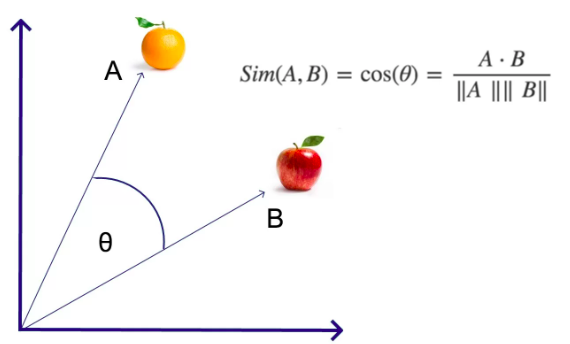

### Exercise 9 <a class="anchor" id="ex9"></a>
Define the word representation matrix (word embeddings) and print its shape.

Why is this the shape of the matrix?

In [10]:
word_rep_mat = u  
print("Shape of the word representation matrix: ", word_rep_mat.shape)


# write your answer below
# The word representation matrix, also known as word embeddings, is a matrix where each row represents a unique word in the corpus. The number of columns corresponds to the dimensions of the embeddings. These embeddings are learned in a way that words with similar meanings are close to each other in this vector space. The shape of the matrix is typically (V, D), where V is the size of the vocabulary (the number of unique words in the corpus), and D is the dimensionality of the embeddings.
# This code prints the shape of the word representation matrix. If you're using the U matrix from the SVD as your word embeddings, the number of rows would be equal to the number of unique words in your corpus, and the number of columns would be equal to the dimensionality of the original space (number of unique words in your corpus).

Shape of the word representation matrix:  (37080, 100)


### Exercise 10 <a class="anchor" id="ex10"></a>
Implement the `cosine_similarity()` method.

In [11]:
def cosine_similarity(v1, v2):
  dot_product = np.dot(v1, v2)
  norm_v1 = np.linalg.norm(v1)
  norm_v2 = np.linalg.norm(v2)
  result = dot_product / (norm_v1 * norm_v2)
  return result

### Exercise 11 <a class="anchor" id="ex11"></a>
Complete the cell below to find the top 20 closest words to each word in the `words` array.

The inner for loop finds the distance between the given word with every other word in the dataset. This distance is measured with cosine similarity using the `cosine_similarity()` method defined above.

Then, the top 20 words with the minimum distance are chosen as the most similar.

In [12]:
words = ["husband","shipping","truck","road","beautiful"]

In [15]:
for word in words:
  dist_matrix = {}
  x = word_to_index[word]
  dist_matrix[x] = 0

  embedings = []
  top_words = []
  for i in range(1, vocab_length):
    if i != x:
      dist_matrix[i] = cosine_similarity(word_rep_mat[x], word_rep_mat[i])

  Highest = nlargest(20, dist_matrix, key = dist_matrix.get)
  print("Top 20 closest words for: ", end = word)
  print()
  for val in Highest:
    print(index_to_words[val])
    embedings.append(u[val])
    top_words.append(index_to_words[val])
  print("---------------------------------------")

Top 20 closest words for: husband
wife
girlfriend
boyfriend
father
mom
dad
sister
son
hubby
daughter
mother
teenage
law
parents
uncle
worker
roommate
fiance
friend
nephew
---------------------------------------
Top 20 closest words for: shipping
eligible
tax
delivery
shipment
membership
reseller
sale
policy
amazons
frustration
vann
warehouse
sells
supersaver
shipped
www
amzn
expedited
newegg
marketplace
---------------------------------------
Top 20 closest words for: truck
van
wander
nightstand
road
motorcycle
dog
car
country
jeep
patio
bike
yard
dash
roof
train
garage
suv
picnic
dashing
walking
---------------------------------------
Top 20 closest words for: road
highway
drifting
interstate
subways
slowing
bounces
slows
jotting
plunked
freeway
upside
stairs
pat
shutting
flying
bouncing
taper
dumbs
path
hill
---------------------------------------
Top 20 closest words for: beautiful
gorgeous
brilliant
vibrant
vivid
glossy
dulls
matte
flipout
lovely
offpicture
enlarges
batman
chromake

### Exercise 12 <a class="anchor" id="ex12"></a>

Remember we removed the words with a frequency less that 5 with the `remove_infrequent_words()` method. Hows the result different if we use frequency = 0, 1, 2, 10? why?

In [ ]:
# write your answer in this cell
#The frequency threshold in the `remove_infrequent_words()` method determines which words are considered "infrequent" and should be removed from the dataset. If you set the frequency threshold to 0, no words would be removed because no word can have a frequency less than 0.
#If the frequency threshold is set to 1, then all words that appear only once in the corpus will be removed. This might remove a lot of unique but rarely used words (also known as hapax legomena) from your dataset.
#If the frequency threshold is set to 2, then all words that appear only once or twice in the corpus will be removed. This might remove even more words from your dataset, but it also may remove words that were typos or other forms of noise in your data.
#If the frequency threshold is set to 10, then all words that appear 10 times or less are removed. This will remove even more words from your dataset, and it might start to remove some words that could be valuable for the task at hand. 
#In general, increasing the frequency threshold removes more and more words from your dataset. This can be beneficial for reducing noise and improving computational efficiency, but it might also remove potentially useful information. The optimal frequency threshold depends on the specific characteristics of the corpus and the task at hand. For instance, a larger corpus might justify a higher frequency threshold, while a smaller or more diverse corpus might require a lower threshold to retain enough words.

## Resources <a class="anchor" id="resources"></a>

- https://cs224d.stanford.edu/lecture_notes/notes1.pdf
- https://towardsdatascience.com/art-of-vector-representation-of-words-5e85c59fee5
- Dataset: http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/
- https://github.com/somyalalwani/Word-Embedding-using-SVD/blob/main/2020201092_NLP_Q1.ipynb
- https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.dok_matrix.html
- https://scikit-learn.org/stable/modules/generated/sklearn.utils.extmath.randomized_svd.html